<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ThermodynamicandphysicalpropertiesofCO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Thermodynamic and physical properties of CO2
#@markdown Carbon dioxide (chemical formula CO2) is a colorless gas with a density about 60% higher than that of dry air. Carbon dioxide consists of a carbon atom covalently double bonded to two oxygen atoms. It occurs naturally in Earth's atmosphere as a trace gas. 
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

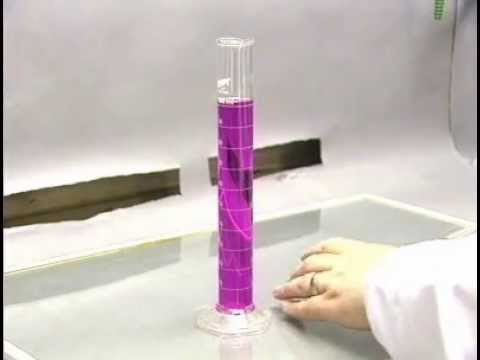

In [2]:
#@title  The Properties Of Carbon Dioxide
from IPython.display import YouTubeVideo
YouTubeVideo('AOfnXKzGO9I', width=600, height=400)

In [3]:
#@title  Calculation of density, speeed of sound, Cp, Cv of CO2
#@markdown Evaluation of different EOS for calculation of thermodynamic properties of CO2 

from neqsim.thermo import fluid, TPflash

temperature = 25.0
pressure = 30.0

#thermodynamicModels srk, pr, cpa, gerg

fluidCO2 = fluid('srk')
fluidCO2.addComponent("CO2", 1.0)
fluidCO2.setPressure(pressure, "bara")
fluidCO2.setTemperature(temperature, "C")
TPflash(fluidCO2)

densityCO2 = fluidCO2.getDensity("kg/m3")

print("CO2 density", densityCO2, " kg/m3")

CO2 density 64.20221175352525  kg/m3


In [22]:
#@title  Calculation of physical properties of CO2
#@markdown Evaluation of different models for calculation of thermodynamic properties of CO2 

from neqsim.thermo import fluid, TPflash

#viscosity models friction theory, LBC, PFCT, polynom

temperature = 25.0
pressure = 30.0

fluidCO2 = fluid('srk')
fluidCO2.addComponent("CO2", 1.0)
fluidCO2.setPressure(pressure, "bara")
fluidCO2.setTemperature(temperature, "C")
TPflash(fluidCO2)

method = "PFCT"
fluidCO2.getPhase('gas').getPhysicalProperties().setViscosityModel(method)

viscosityCO2 = fluidCO2.getViscosity("cP")

print("CO2 viscosity", viscosityCO2, " CP")

CO2 viscosity 0.01656877112657292  CP


# Properties of CO2 with other trace components
Properties of CO2 with traces of compoents such as methane and nitrogen is often needed in design of CO2 reinjection systems. THe following example shows examples of calculations of such fluids. 

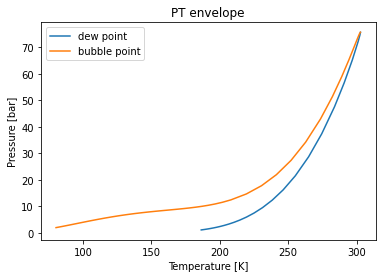

                           total          gas                       
            methane         1E-2         1E-2        [mole fraction]
           nitrogen         1E-2         1E-2        [mole fraction]
                CO2       9.8E-1       9.8E-1        [mole fraction]
                                                                    
            Density                 7.66948E1               [kg/m^3]
      PhaseFraction                       1E0        [mole fraction]
          MolarMass    4.35704E1    4.35704E1              [kg/kmol]
           Z factor                 8.0672E-1                    [-]
 Heat Capacity (Cp)                 1.17224E0              [kJ/kg*K]
 Heat Capacity (Cv)                6.92695E-1              [kJ/kg*K]
     Speed of Sound                 2.46031E2                [m/sec]
           Enthalpy   -1.63753E1   -1.63753E1                [kJ/kg]
            Entropy  -6.72157E-1  -6.72157E-1              [kJ/kg*K]
     JT coefficient               

In [5]:
from neqsim.thermo import fluid, TPflash,printFrame

methane = 1.0
nitrogen = 1.0

fluid1 = fluid('srk')
fluid1.addComponent("methane", methane) #set mole fraction methane
fluid1.addComponent("nitrogen", nitrogen) #set mole fraction nitrogen
fluid1.addComponent("CO2", 100.0-methane-nitrogen) #set mole fraction CO2
fluid1.setMixingRule('classic')

#Calculation of the phase envelope of the CO2 mixture
phaseenvelope(fluid1, True)

# Calculating properties of the fluid at given temperature and pressure
fluid1.setTemperature(25.0, 'C')
fluid1.setPressure(35.0, 'bara')
TPflash(fluid1)
printFrame(fluid1)

# Depressurization of CO2
In the following example we calculate the temperature and phase behaviour after depressurization of CO2.

In [21]:
from neqsim.thermo import fluid, TPflash,printFrame,PHflash, PHsolidflash,TPsolidflash,dewt,bubt


fluid1 = fluid('srk')
fluid1.addComponent("CO2", 100.0)

fluid1.setTemperature(-20.0, "C")
fluid1.setPressure(18.0, "bara")
fluid1.setMultiPhaseCheck(True)
fluid1.setSolidPhaseCheck("CO2")

#bubt(fluid1)
dewt(fluid1)
print("temperature before deprezurization ", fluid1.getTemperature("C"), " C")
TPsolidflash(fluid1)
printFrame(fluid1)
fluid1.initProperties()
enthalpy = fluid1.getEnthalpy()

fluid1.setPressure(1.0, "bara")
PHsolidflash(fluid1, enthalpy)
TPsolidflash(fluid1)
printFrame(fluid1)

print("temperature after deprezurization ", fluid1.getTemperature("C"), " C")


temperature before deprezurization  -22.8869723327752  C
                           total                 gas                       
                CO2          1E0                 1E0        [mole fraction]
                                                                           
            Density                        4.65149E1               [kg/m^3]
      PhaseFraction                              1E0        [mole fraction]
          MolarMass      4.401E1             4.401E1              [kg/kmol]
           Z factor                       8.21346E-1                    [-]
 Heat Capacity (Cp)                        1.03443E0              [kJ/kg*K]
 Heat Capacity (Cv)                        6.3012E-1              [kJ/kg*K]
     Speed of Sound                        2.24636E2                [m/sec]
           Enthalpy   -4.40932E1          -4.40932E1                [kJ/kg]
            Entropy  -6.85529E-1         -6.85529E-1              [kJ/kg*K]
     JT coefficient            